# Departamento de relações públicas

## Importação das bibliotecas e base de dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
reviews_df = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [4]:
reviews_df.shape

(3150, 5)

In [5]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

## Exploração dos dados

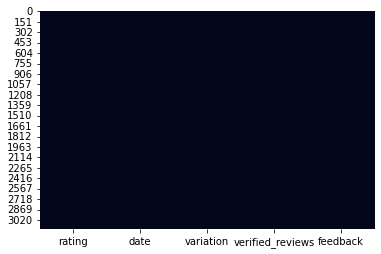

In [9]:
#Verificando a existência ou não de dados nulos
sns.heatmap(reviews_df.isnull(), cbar=False);

In [10]:
reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'feedback'}>]], dtype=object)

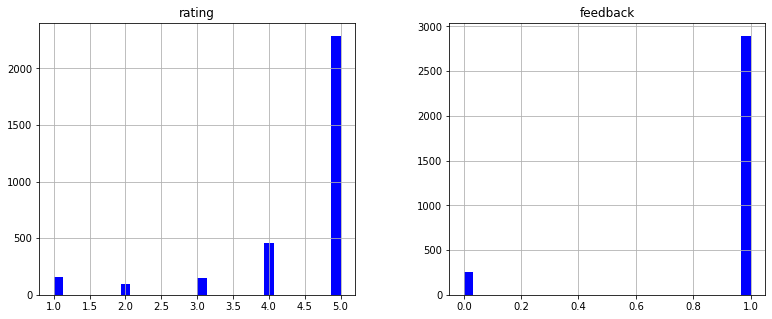

In [11]:
#Gerando histograms (apenas para os atributos numéricos)
reviews_df.hist(bins = 30, figsize=(13,5), color = 'b')

In [12]:
#Criando uma nova coluna para saber o tamanho dos textos de reviews (considerando os espaços)
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


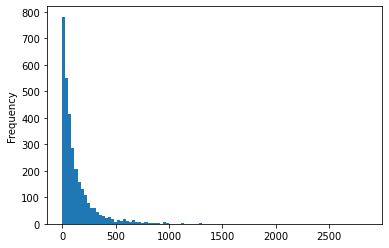

In [13]:
reviews_df['length'].plot(bins = 100, kind = 'hist');

In [14]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [15]:
#Verificando o maior review, para verificar integridade dos dados
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [16]:
#Verificando o menor review
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [17]:
#Verificando um review com um número de caracteres próximos da média
reviews_df[reviews_df['length'] == 131]['verified_reviews'].iloc[0]

'Never had ANY issue with buying use electronics as long as I get the GOOD or LIKE NEW. Just read the comment to see why it is used.'

In [18]:
#Criando um novo DF apenas com os reviews positivos
positive = reviews_df[reviews_df['feedback'] == 1]

In [19]:
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [20]:
positive.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


In [21]:
#Criando um novo DF apenas com os reviews negativos
negative = reviews_df[reviews_df['feedback'] == 0]

In [22]:
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [23]:
negative.describe()

,rating,feedback,length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


Algo a se observar, é que a média de caracteres de avaliações <b>negativas</b> é superior à média de caracteres em avaliações <b>positivas</b>!!!

c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


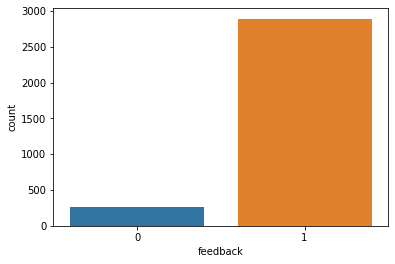

In [24]:
#Comparivo entre reviews positivos x negativos
sns.countplot(reviews_df['feedback']);

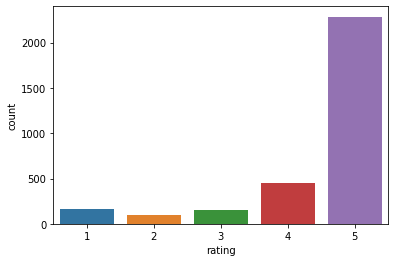

In [25]:
#Verificando quanato ao rating
sns.countplot(x = 'rating', data = reviews_df);

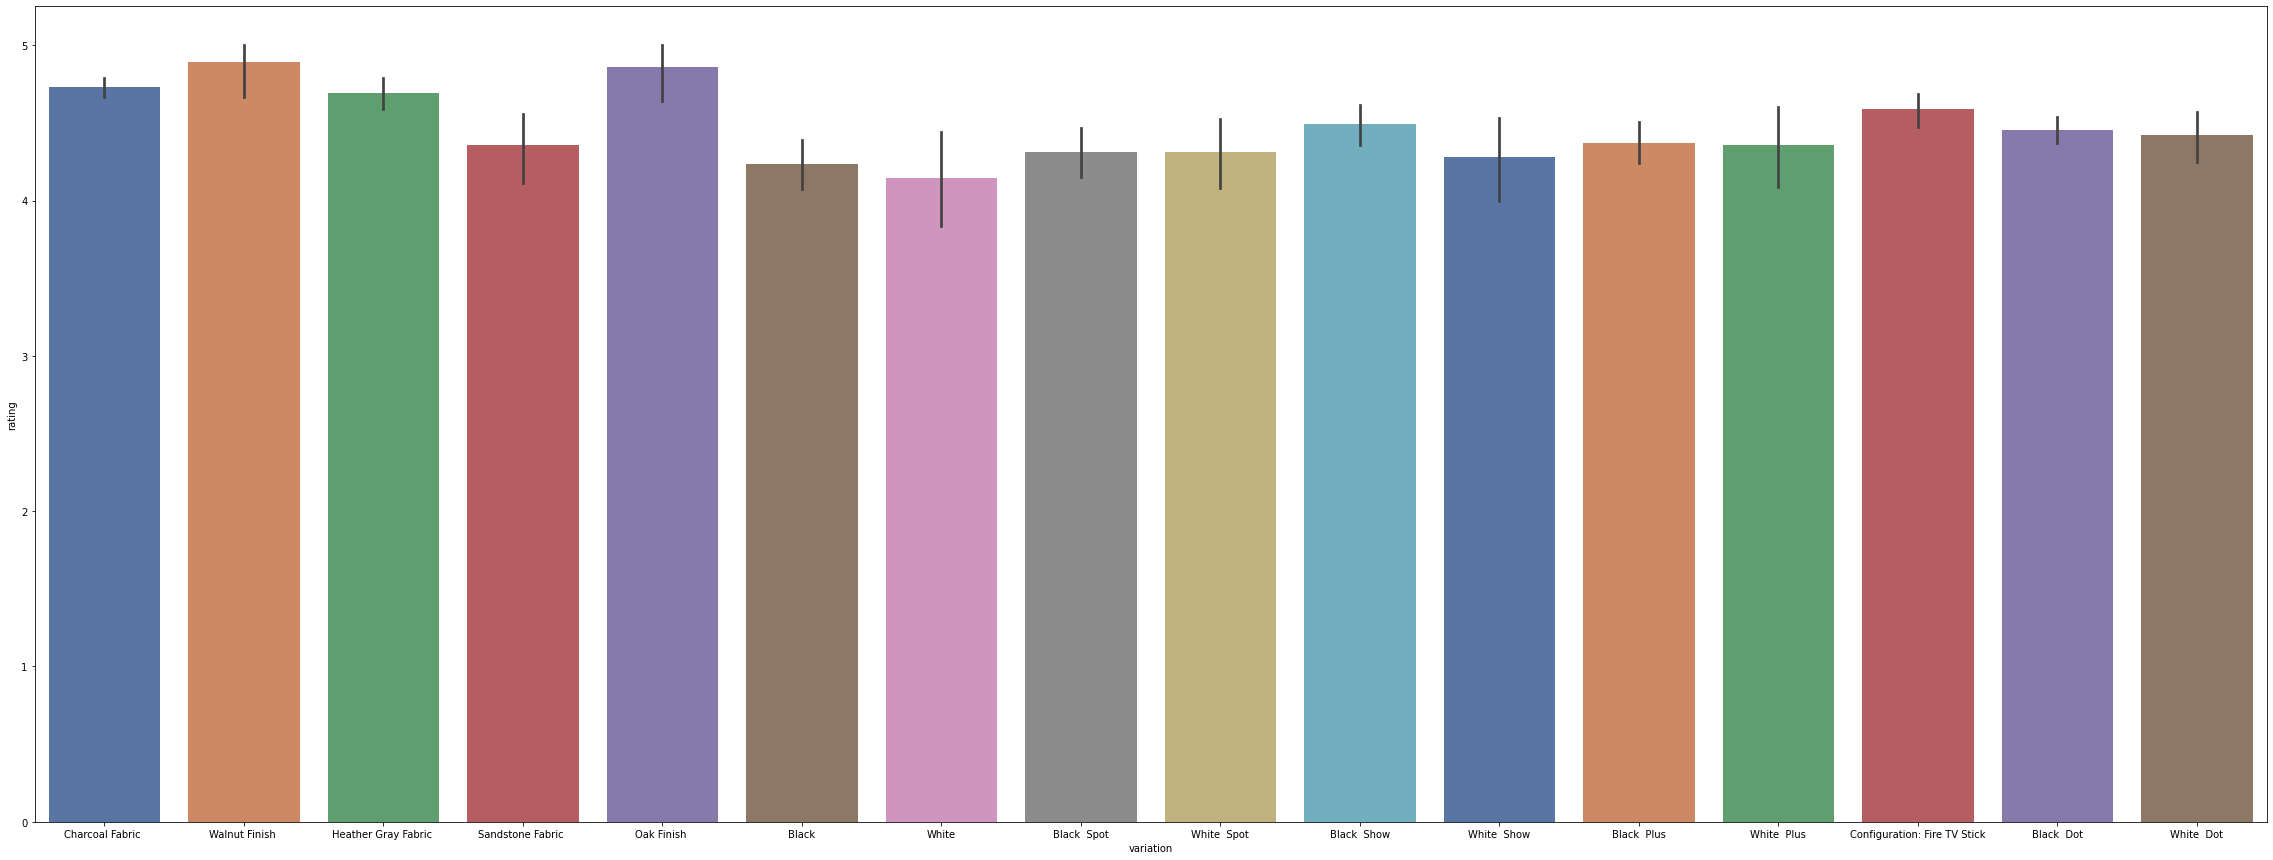

In [26]:
#Verificando a existência ou não de relação entre as variações de produtos
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep');

### Geração de Nuvem de Palavras
Com as palavras mais comuns que aparecem nas nossas avaliações 

In [27]:
sentences = reviews_df['verified_reviews'].tolist()
len(sentences)

3150

In [28]:
print(sentences[0:10])

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [29]:
setenças_string_unica = ' '.join(sentences)

In [30]:
setenças_string_unica

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [31]:
#Tamanho de nossa nova string com todas as avaliações
len(setenças_string_unica)

419105

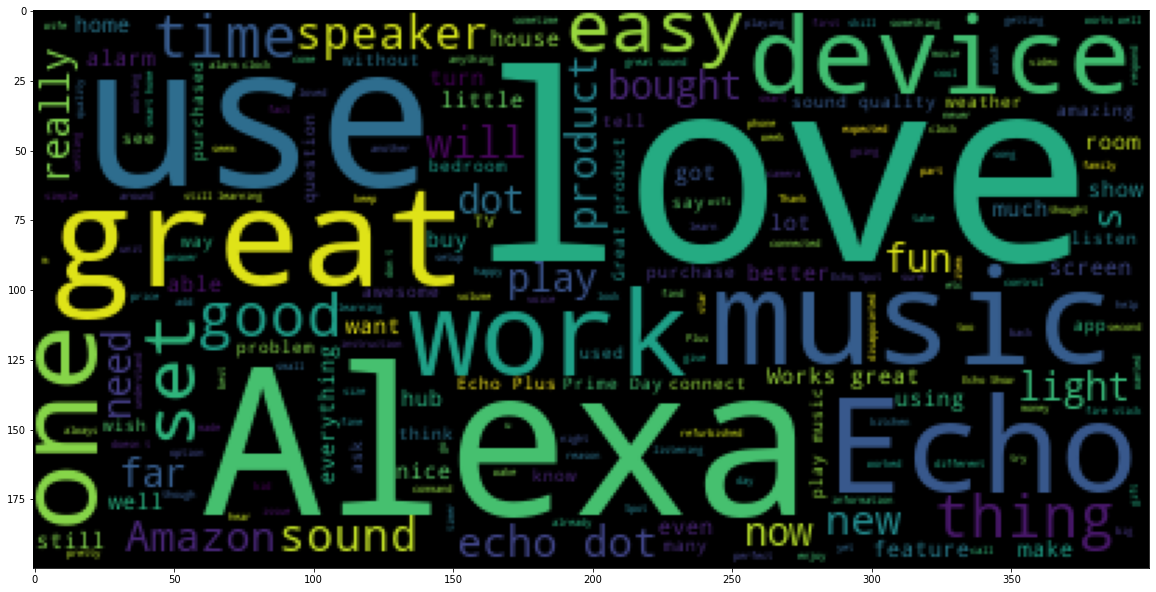

In [32]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(setenças_string_unica));

In [33]:
lista_negativa = negative['verified_reviews'].tolist()
setenças_negativas_string_unica = ' '.join(lista_negativa)

In [34]:
#Tamanho de nossa nova string com todas as avaliações negativas
len(setenças_negativas_string_unica)

55573

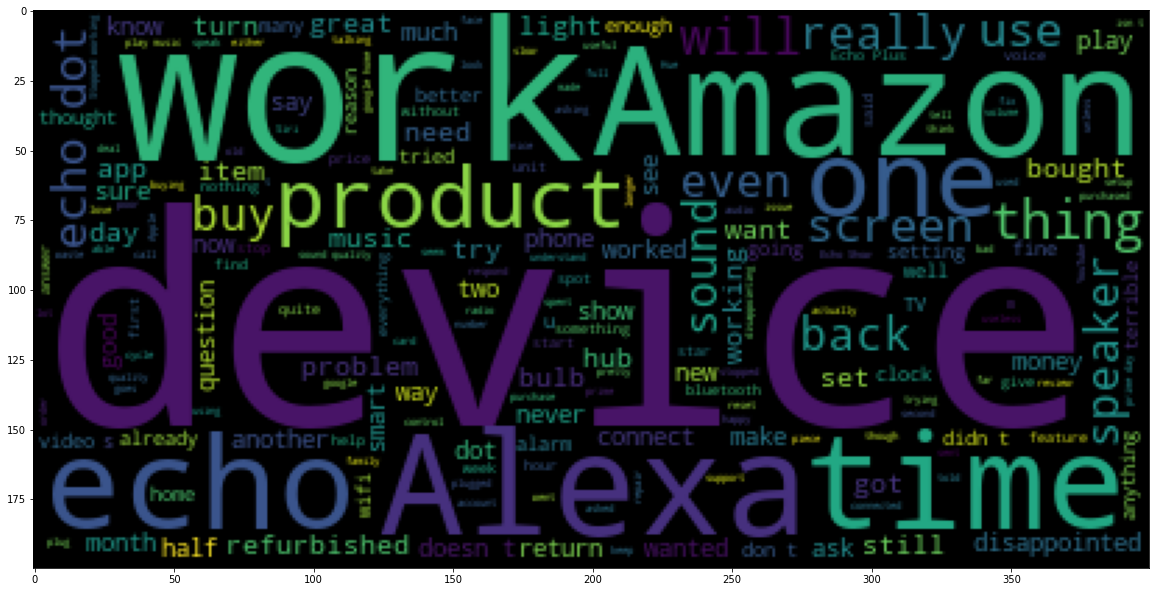

In [35]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(setenças_negativas_string_unica));

## Limpeza dos dados

In [36]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


Apagar algumas colunas que são irrelevantes para análise! Data não interfere, rating foi utilizada para gerar a coluna de feedback, e a length foi usamos apenas para visualização do tamanho das avaliações.

In [37]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis = 1)

In [38]:
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


Como a coluna de variação apresenta dados categóricos, vamos fazer a criação das váriaveis dummys

In [39]:
reviews_df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [40]:
X_cat = reviews_df[['variation']]
X_cat

,variation
0,Charcoal Fabric
1,Charcoal Fabric
2,Walnut Finish
3,Charcoal Fabric
4,Charcoal Fabric
...,...
3145,Black Dot
3146,Black Dot
3147,Black Dot
3148,White Dot


In [41]:
#Utilizando o OneHotEncoder para realizar a transformação dos dados categoricos em uma matriz numérica
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [42]:
X_cat[1], X_cat.shape

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (3150, 16))

In [43]:
type(X_cat)

numpy.ndarray

In [44]:
#Transformando a array em dataframe para poder fazer a união com o DF completo
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [45]:
#Excluir a coluna de variação, já que ela foi processada e tranformada em variáveis gummys
reviews_df.drop(['variation'], axis = 1, inplace = True)

In [46]:
reviews_df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [47]:
#União dos dois DF (geral + atributos categóricos)
reviews_df = pd.concat([reviews_df, X_cat], axis = 1)
reviews_df

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Remoção de pontuação dos textos
É necessário para melhor processamento/interpretação das avaliações pelo algoritmo.

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
teste = 'Fun item to play with and get used to using. Sometimes has hard time answering the questions you ask, but I think it will be better!'

In [50]:
teste_pontuaçao_removida = [char for char in teste if char not in string.punctuation]

In [51]:
print(teste_pontuaçao_removida)

['F', 'u', 'n', ' ', 'i', 't', 'e', 'm', ' ', 't', 'o', ' ', 'p', 'l', 'a', 'y', ' ', 'w', 'i', 't', 'h', ' ', 'a', 'n', 'd', ' ', 'g', 'e', 't', ' ', 'u', 's', 'e', 'd', ' ', 't', 'o', ' ', 'u', 's', 'i', 'n', 'g', ' ', 'S', 'o', 'm', 'e', 't', 'i', 'm', 'e', 's', ' ', 'h', 'a', 's', ' ', 'h', 'a', 'r', 'd', ' ', 't', 'i', 'm', 'e', ' ', 'a', 'n', 's', 'w', 'e', 'r', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'q', 'u', 'e', 's', 't', 'i', 'o', 'n', 's', ' ', 'y', 'o', 'u', ' ', 'a', 's', 'k', ' ', 'b', 'u', 't', ' ', 'I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'i', 't', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'b', 'e', 't', 't', 'e', 'r']


In [52]:
teste_pontuaçao_removida = ''.join(teste_pontuaçao_removida)
teste_pontuaçao_removida

'Fun item to play with and get used to using Sometimes has hard time answering the questions you ask but I think it will be better'

## Remoção de stop words

In [53]:
import nltk

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
from nltk.corpus import stopwords
print(stopwords.words('english'))   #importação das stopwords em inglês, pois é a linguagem do nosso banco

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [56]:
len(stopwords.words('english'))

179

In [57]:
teste_pontuaçao_removida

'Fun item to play with and get used to using Sometimes has hard time answering the questions you ask but I think it will be better'

In [58]:
#Removendo as StopWords da frase teste
teste_pontuaçao_stop_removidas = [word for word in teste_pontuaçao_removida.split() if word.lower() not in stopwords.words('english')]

In [59]:
print(teste_pontuaçao_stop_removidas)

['Fun', 'item', 'play', 'get', 'used', 'using', 'Sometimes', 'hard', 'time', 'answering', 'questions', 'ask', 'think', 'better']


## Count vectorization (tokenização)
Tokenização é um processo de substituição dos dados reais por outros equivalentes. Nesse caso, será feita a substituição de palavras por valores numéricos para melhor interpretação do algoritmo!

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
sample_data = ['This is the first document.','This document is the second document.',
               'And this is the third one.','Is this the first document?']

In [62]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [63]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [65]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## Pipeline de limpeza dos textos

In [66]:
def message_cleaning(message):
  text = [char for char in message if char not in string.punctuation]  #Remoção de Pontuação
  text = ''.join(text)
  text = [word for word in text.split() if word.lower() not in stopwords.words('english')] #Remoção de StopWords
  return text

In [67]:
#Criação de um novo df para limpeza, para depois poder fazer uma comparação com o df inicial
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [68]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [69]:
print(reviews_df['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [70]:
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [71]:
#Tranformação de palavras em números com a "tokenização" do meu texto
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [72]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [73]:
len(vectorizer.get_feature_names())

5211

In [74]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [75]:
reviews_countvectorizer.shape

(3150, 5211)

In [76]:
reviews_df

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [77]:
#Remover as palavras do meu DF original
reviews_df.drop(['verified_reviews'], axis = 1, inplace=True)
reviews_df

,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
type(reviews_countvectorizer)

scipy.sparse._csr.csr_matrix

In [79]:
#Tranformando minhas matrizes de números para um DF, para que seja possível a junção com meu DF inicial
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
type(reviews)

pandas.core.frame.DataFrame

In [80]:
reviews_df = pd.concat([reviews_df, reviews], axis = 1)

In [81]:
reviews_df

,feedback,0,1,2,3,4,5,6,7,8,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
#Criando a váriavel X que terá os atributos previsores 
X = reviews_df.drop(['feedback'], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#Criando a váriável Y que terá as classes
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

________

## Treinamento e avaliação do Naive Bayes

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [85]:
X_train.shape, X_test.shape

((2520, 5227), (630, 5227))

In [86]:
#Como o DF é composto por uma distribuição multinomial, não usaremos o GausianNB (mais utilizado) e sim o MiltinomialNB
from sklearn.naive_bayes import MultinomialNB

In [87]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [89]:
y_pred = naive_bayes.predict(X_test)

In [90]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [91]:
y_test

955     1
726     1
1747    1
260     1
29      1
       ..
753     1
1302    1
2906    1
2388    1
1754    1
Name: feedback, Length: 630, dtype: int64

In [92]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [93]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 21,  18],
       [ 10, 581]], dtype=int64)

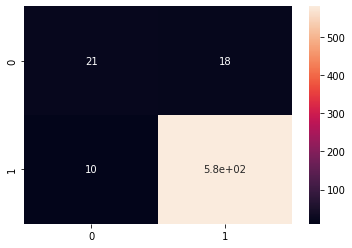

In [94]:
sns.heatmap(cm, annot=True);

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60        39
           1       0.97      0.98      0.98       591

    accuracy                           0.96       630
   macro avg       0.82      0.76      0.79       630
weighted avg       0.95      0.96      0.95       630



<b>Conclusão:</b> O modelo é mais preciso quando se trata de avaliações positivas, isso se dá devido ao desbalanceamento do DF, que contém bem mais avaliações positivas que negativa!

## Treinamento e avaliação da Regressão Logística

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [98]:
y_pred = logistic.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred)

0.953968253968254

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.38      0.51        39
           1       0.96      0.99      0.98       591

    accuracy                           0.95       630
   macro avg       0.86      0.69      0.74       630
weighted avg       0.95      0.95      0.95       630



<b>Conclusão:</b> Resultados bem parecidos, devido ao desbalanceamento dos dados. Apesar disso, o algoritmo NB apresentou um resultado um pouco melhor!

## Classificação de somente uma frase

In [101]:
import pickle

In [102]:
with open('classificador_textos.pkl', 'wb') as f:
  pickle.dump([naive_bayes, onehotencoder, vectorizer], f)

In [103]:
with open('classificador_textos.pkl', 'rb') as f:
  bayes, onehot, vec = pickle.load(f)

In [104]:
bayes

MultinomialNB()

In [105]:
onehot

OneHotEncoder()

In [106]:
vec

CountVectorizer(analyzer=<function message_cleaning at 0x000002BDEB5C2A70>)

In [107]:
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [124]:
texto_negativo = negative.iloc[0:1, [2,3]]
texto_negativo

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [125]:
X_cat = texto_negativo[['variation']]
X_cat

,variation
46,Charcoal Fabric


In [126]:
X_cat = onehot.transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
texto_negativo

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [128]:
#Igualando os indexs para não termos duas linhas
X_cat.index = texto_negativo.index

In [129]:
X_cat.index, texto_negativo.index

(Int64Index([46], dtype='int64'), Int64Index([46], dtype='int64'))

In [130]:
negative_df = pd.concat([texto_negativo, X_cat], axis = 1)
negative_df

,variation,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
negative_df.drop(['variation'], axis = 1, inplace = True)
negative_df

,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
negative_coutvectorizer = vec.transform(negative_df['verified_reviews'])

In [133]:
negative_coutvectorizer

<1x5211 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [134]:
review = pd.DataFrame(negative_coutvectorizer.toarray())
review

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
negative_df.drop(['verified_reviews'], axis = 1, inplace = True)
negative_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
negative_df.index = review.index

In [137]:
negative_final = pd.concat([negative_df, review], axis = 1)
negative_final

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
bayes.predict(negative_final)

array([1], dtype=int64)

In [123]:
bayes.predict_proba(negative_final)

array([[0.02715383, 0.97284617]])